In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("imported")

imported


In [2]:
netflix_overall=pd.read_csv("data/netflix_titles.csv")

In [3]:
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# data count
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [5]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

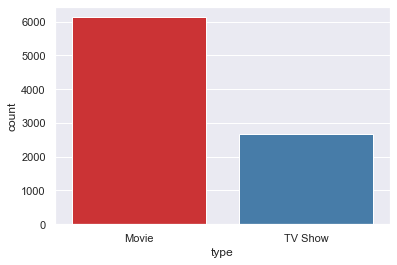

In [6]:
sns.set(style="darkgrid")
ax=sns.countplot(x="type", data=netflix_overall, palette="Set1")

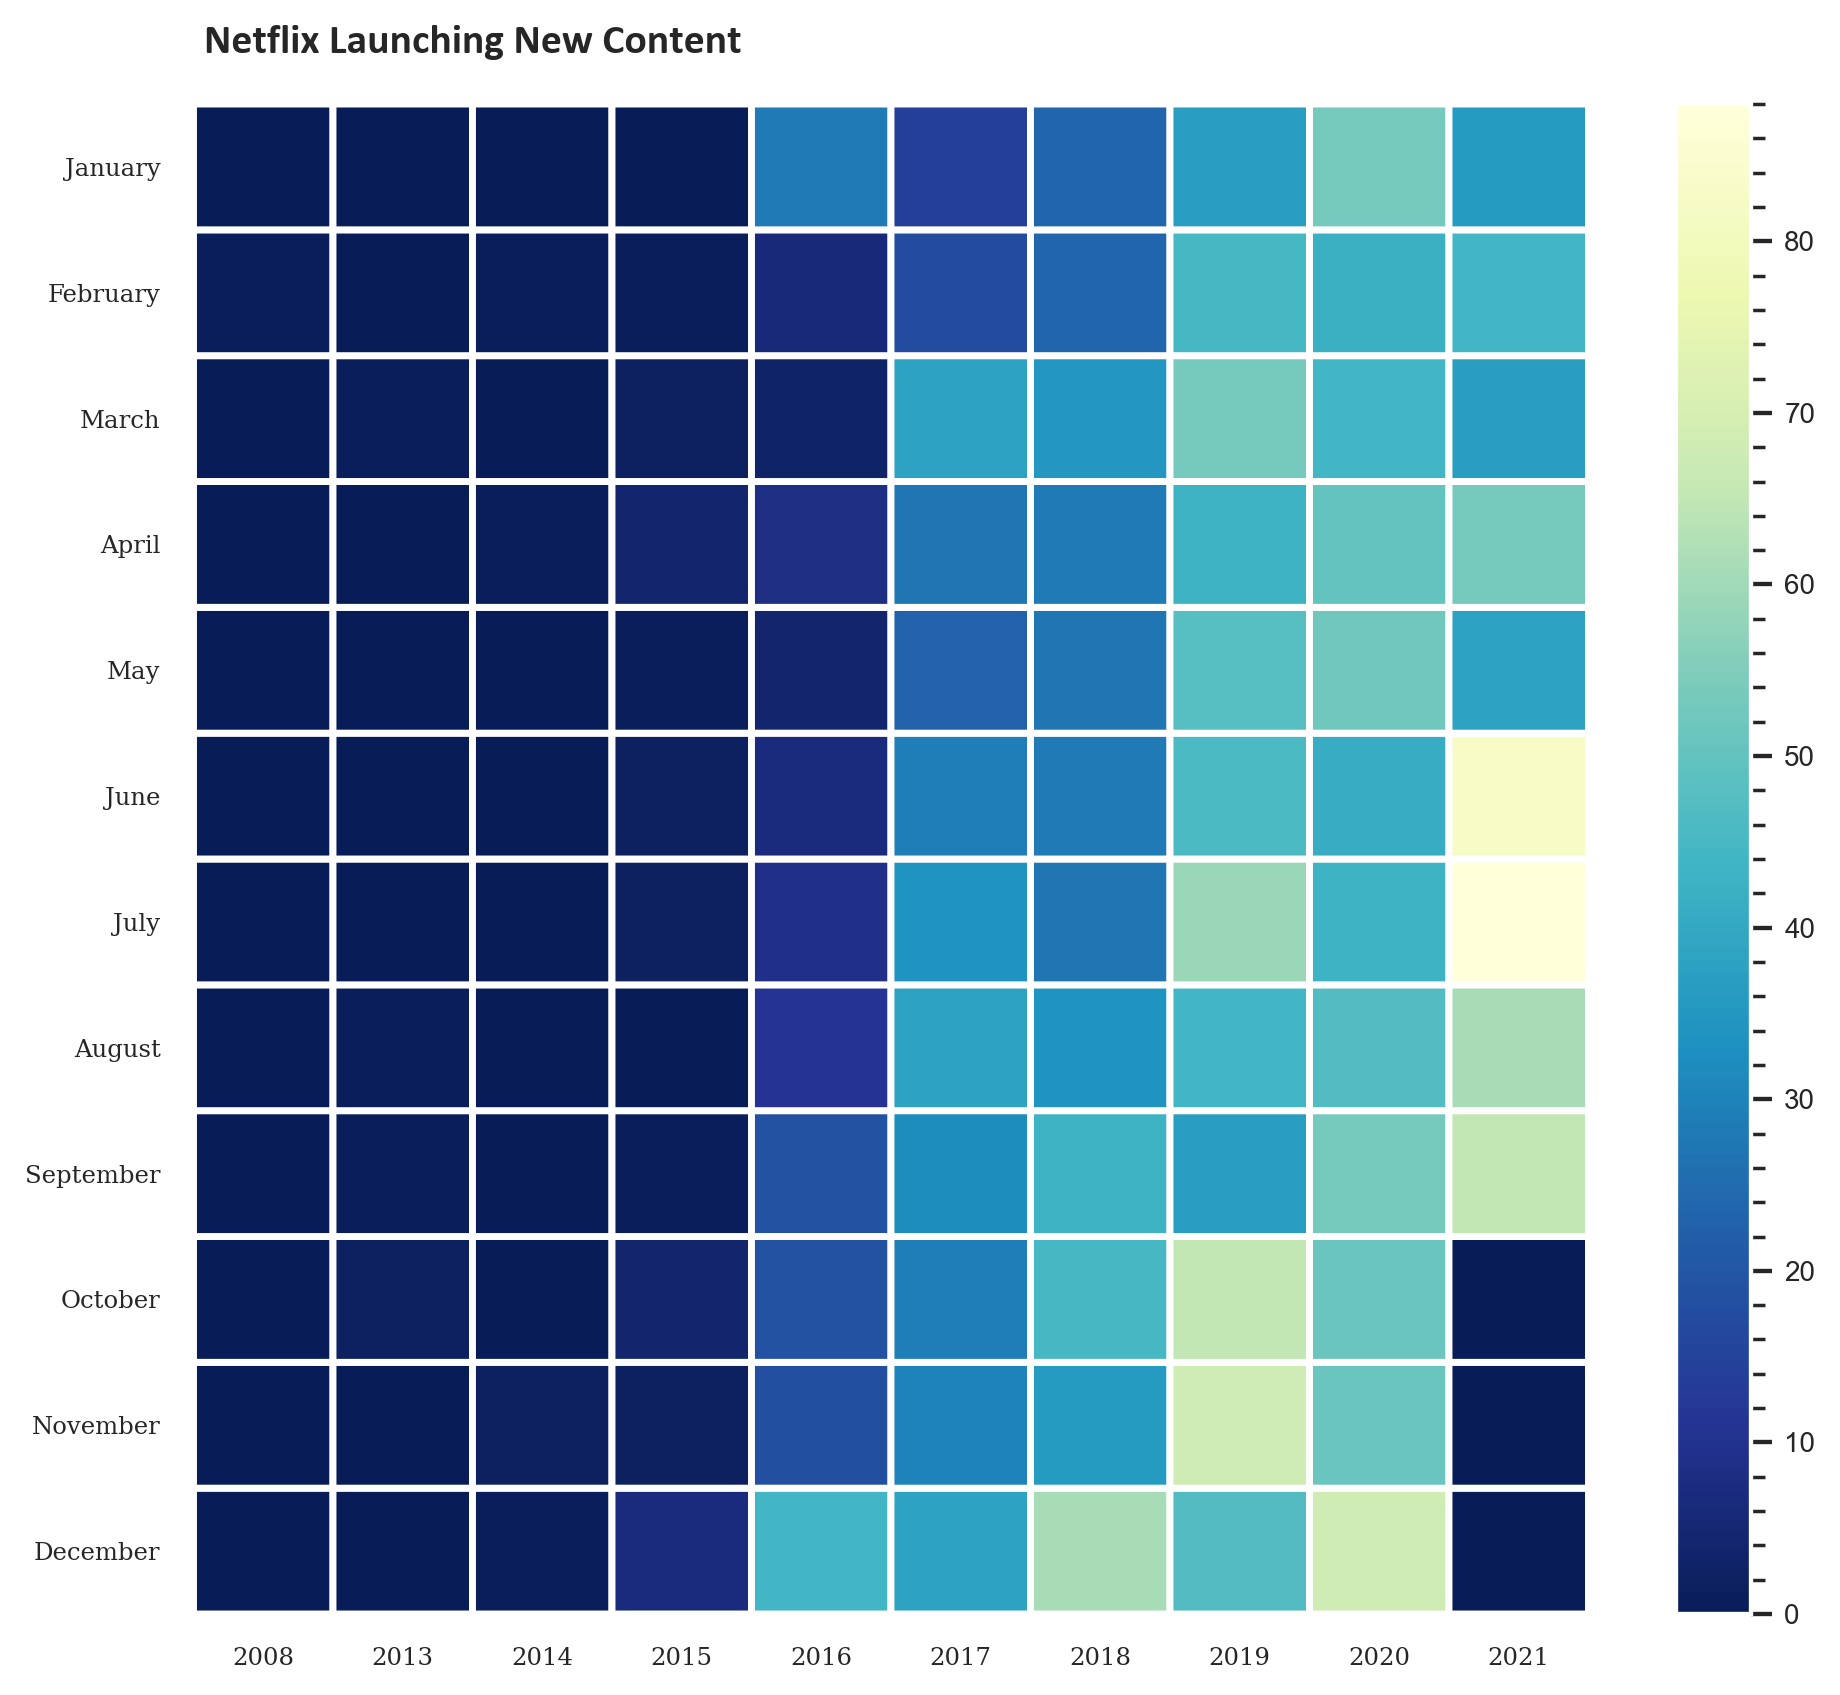

In [7]:
# when is the best timing to release new content on the netflix platform
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(9, 8), dpi=250)
plt.pcolor(df, cmap='YlGnBu_r', edgecolors='white', linewidths=2) 
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Launching New Content', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

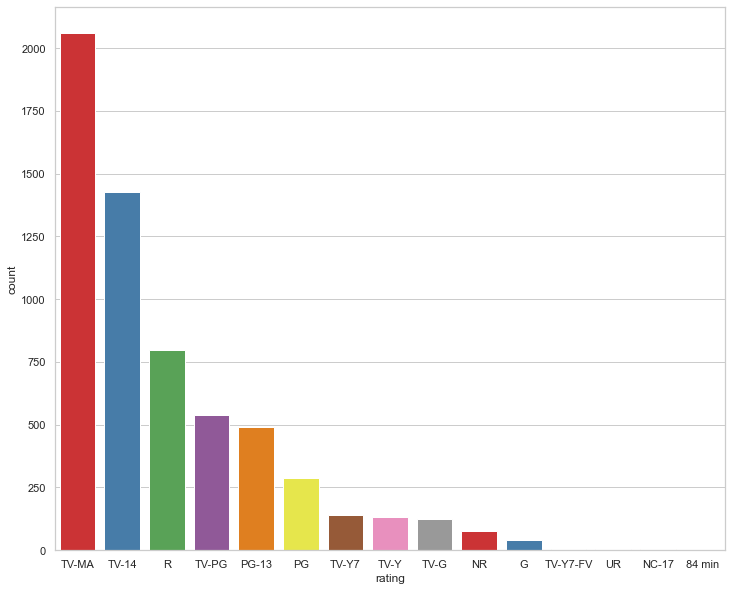

In [8]:
#Now let's analyze the movie ratings and their relative distribution

plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set1", \
                   order=netflix_movies['rating'].value_counts().index[0:15])

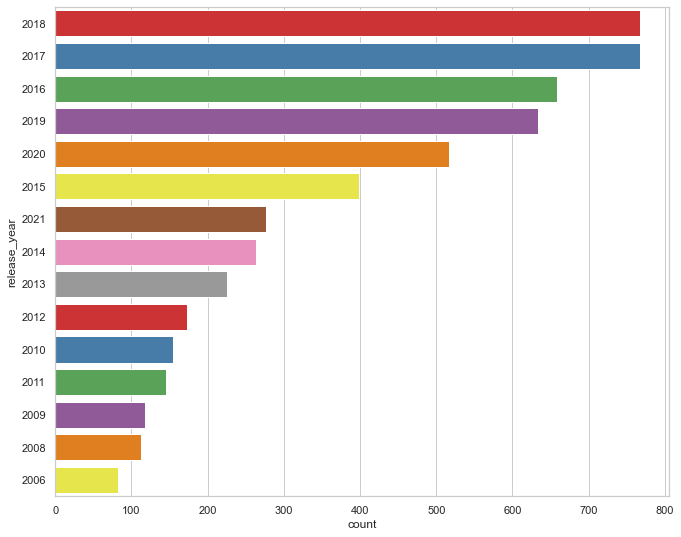

In [9]:
#Based on above comparison, mature content that is rated MA, 
# 14+ or R-rated outpaces more family friendly and PG content

#Which years the most content was released

plt.figure(figsize=(11,9))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", \
                   order=netflix_movies['release_year'].value_counts().index[0:15])

In [10]:
# analyse average duration of movies on netflix
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

<ipython-input-10-ed82e556fd60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')


ValueError: invalid literal for int() with base 10: 'nan'

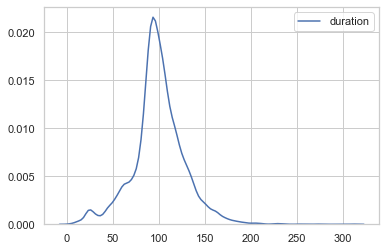

In [11]:
sns.set(style="whitegrid")
sns.kdeplot(data=netflix_movies['duration'], shade=False)

In [12]:
#netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
#netflix_movies['duration']=netflix_movies['duration'].str.replace('min',' ')

<ipython-input-12-b7a5e064a8e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration']=netflix_movies['duration'].str.replace('min',' ')


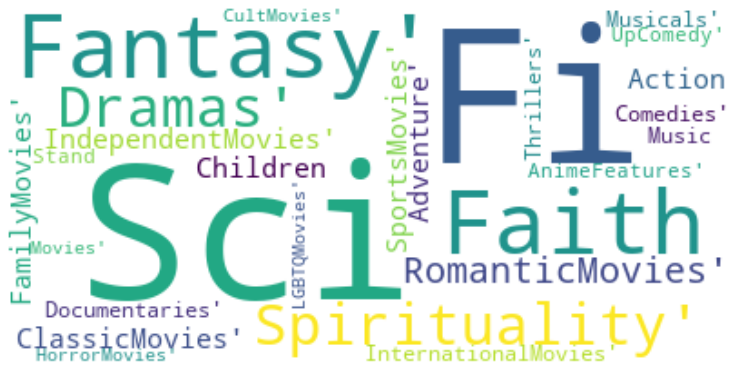

In [13]:
#Based on the above chart, the average duration of movies on Netflix is between 80 to 150 minutes
#Now let's generate a word cloud of the most common genres for movies by using the word cloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# TFidVectorizer library from SKLearn that comes built-in with recommender system algorithms
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)